## Importing packeges

In [1]:
import preprocessor as pp
import pandas as pd
import numpy as np
import myplot as mpf

In [2]:
filesname_men = [r'data_files/menn/kreftregisteret_menn_norge.xlsx', r'data_files/menn/reseptregisteret_menn_norge.xls']
filesname_women = [r'data_files/kvinne/kreftregisteret_women_norge.xlsx', r'data_files/kvinne/munnoganus_kvinner.xlsx', 
                   r'data_files/kvinne/livmorlegemeoglivmoruspesifisert.xlsx', 
                   r'data_files/kvinne/reseptregisteret_women_norge.xls']

files_men = []
files_women = []
for i in range(len(filesname_men)):
    files_men.append(pp.excel_lines(filesname_men[i]))
for i in range(len(filesname_women)):
    files_women.append(pp.excel_lines(filesname_women[i]))

### Defining parameters

In [3]:
## Keeping on the desired columns
cancer_registry = pd.DataFrame(files_men[0], columns= ['Kreftform','Kjønn','Alder','År','Tilfeller','Personår',
                                                   'Insidensrate'])

## X axis tick label
ages_xlabel = []
num_years = 14
for i in range(9):
    ages_xlabel.append(cancer_registry['Alder'][i*num_years])

labels = []
for j in range(num_years):
    labels.append('Year: '+str(cancer_registry['År'][j])+'')

### Extracting data from Men's excel file

In [4]:
### Men
#---------------------------------------------------------------------------------------------------
## Cancer registry data
c_A_ageM = pp.excel_extract(filesname_men[0], keyword = ['År','all'], num_parameter = num_years, 
                            case = 'Tilfeller', cancer_type = 'Anus')
c_MO_ageM = pp.excel_extract(filesname_men[0], keyword = ['År','all'], num_parameter = num_years, 
                             case = 'Tilfeller', cancer_type = 'Munn, andre')
## incidance rate cases
inci_A_ageM = pp.excel_extract(filesname_men[0], keyword = ['År','all'], num_parameter = num_years, 
                               case = 'Insidensrate', cancer_type = 'Anus')
inci_MO_ageM = pp.excel_extract(filesname_men[0], keyword = ['År','all'], num_parameter = num_years, 
                                case = 'Insidensrate', cancer_type = 'Munn, andre')
#---------------------------------------------------------------------------------------------------

### Women
#---------------------------------------------------------------------------------------------------
## Cancer registry data
c_livmorhals_ageW = pp.excel_extract(filesname_women[0], keyword = ['År','all'], num_parameter = num_years,
                                     case = 'Tilfeller', cancer_type = 'Livmorhals')

c_A_ageW = pp.excel_extract(filesname_women[1], keyword = ['År','all'], num_parameter = num_years, 
                            case = 'Tilfeller', cancer_type = 'Anus')
c_MO_ageW = pp.excel_extract(filesname_women[1], keyword = ['År','all'], num_parameter = num_years, 
                             case = 'Tilfeller', cancer_type = 'Munn, andre')

c_livmorlegeme_ageW = pp.excel_extract(filesname_women[2], keyword = ['År','all'], num_parameter = num_years,
                                       case = 'Tilfeller', cancer_type = 'Livmorlegeme')
c_livmor_ageW = pp.excel_extract(filesname_women[2], keyword = ['År','all'], num_parameter = num_years,
                                 case = 'Tilfeller', cancer_type = 'Livmor, usesifisert')

## incidance rate cases
inci_livmorhals_ageW = pp.excel_extract(filesname_women[0], keyword = ['År','all'], num_parameter = num_years,
                                        case = 'Insidensrate', cancer_type = 'Livmorhals')

inci_A_ageW = pp.excel_extract(filesname_women[1], keyword = ['År','all'], num_parameter = num_years, 
                               case = 'Insidensrate', cancer_type = 'Anus')
inci_MO_ageW = pp.excel_extract(filesname_women[1], keyword = ['År','all'], num_parameter = num_years, 
                                case = 'Insidensrate', cancer_type = 'Munn, andre')

inci_livmorlegeme_ageW = pp.excel_extract(filesname_women[2], keyword = ['År','all'], num_parameter = num_years,
                                          case = 'Insidensrate', cancer_type = 'Livmorlegeme')
inci_livmor_ageW = pp.excel_extract(filesname_women[2], keyword = ['År','all'], num_parameter = num_years,
                                    case = 'Insidensrate', cancer_type = 'Livmor, usesifisert')
#---------------------------------------------------------------------------------------------------

### HPV vaccine data

In [5]:
## Men data preparation
#--------------------------------------------------------------------------------
dataframe = files_men[1][8:293]
pd_registry = dataframe

pd_registry['Year'] = dataframe['Unnamed: 1']
pd_registry['Age'] = dataframe['Unnamed: 2']
pd_registry['Gender'] = dataframe['Unnamed: 3']
pd_registry['Cases'] = dataframe['Unnamed: 6']

for i in range(1,9):
    # Dropping old columns
    pd_registry.drop(columns = ['Unnamed: '+str(i)+''], inplace = True)

# just some labels
pd_year_label = []
for i in range(4,10):
    pd_year_label.append( 'Year: 200'+str(i)+'' )
for i in range(10,19):
    pd_year_label.append( 'Year: 20'+str(i)+'' )
# extracting ages
pd_age = np.array(pd_registry['Age'][0:19])
#--------------------------------------------------------------------------------

## extracting data for each year, where each list corresponds to an age
pd_data = []
for i in range(num_years):
    start = i*len(pd_age)
    end = (1 + i)*len(pd_age)
    
    pd_data.append( np.array(pd_registry['Cases'][start:end]) )

## changing "under 5" labels data to 2
pd_data2 = []
for i in range(len(pd_data)):
    for j in range(len(pd_data[i])):
        if pd_data[i][j] == 'under 5':
            pd_data[i][j] = 2
            
    pd_data2.append( pd_data[i] )

## adding ages together, so that they match the cancer age periods.
pd_casesM = []
for i in range(len(pd_data2)):
    pd_data3 = []
    for j in range(0,len(pd_data2[i])-3,2):
        pd_data3.append( pd_data2[i][j] + pd_data2[i][j+1])
    
    # last three 
    pd_data3.append( pd_data2[i][j+2] + pd_data2[i][j+3] + pd_data2[i][j+4])
    
    pd_casesM.append( np.array(pd_data3) )
##-----------------------------------------------------------------------------

## Women data preparation
#--------------------------------------------------------------------------------
dataframe = files_women[3][8:293]
pd_registry = dataframe

pd_registry['Year'] = dataframe['Unnamed: 1']
pd_registry['Age'] = dataframe['Unnamed: 2']
pd_registry['Gender'] = dataframe['Unnamed: 3']
pd_registry['Cases'] = dataframe['Unnamed: 6']

for i in range(1,9):
    # Dropping old columns
    pd_registry.drop(columns = ['Unnamed: '+str(i)+''], inplace = True)

# extracting data
pd_casesW = pp.Prescription_data(pd_registry)
#--------------------------------------------------------------------------------

/Users/luxiusmmm/Library/Python/3.6/lib/python/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/luxiusmmm/Library/Python/3.6/lib/python/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
/Users/luxiusmmm/Library/Python/3.6/lib/python/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentatio

We expect the correlation between cancer and vaccination to be
$$Cancer(age, year) \propto \sum_{i=year_0}^{year} V(age_i,i)$$
where $age_i = age - (year - i)$. Since we are considering an accumulation of ages in periods of 10, we can approximate by suming over the years under the picked year.

In [6]:
V_correlationM = []
V_correlationW = []

# running loop over all picked years 
for yp in range(len(pd_casesM)):
    tempM = np.zeros(len(pd_casesM[0]))
    tempW = np.zeros(len(pd_casesM[0]))
    # running loop over all ages
    for a in range(len(pd_casesM[0])):
        #running loop over all years under the picked year, namely yp
        for y in range(yp):
            tempM[a] = tempM[a] + pd_casesM[y][a]
            tempW[a] = tempW[a] + pd_casesW[y][a]
    
    V_correlationM.append( tempM )
    V_correlationW.append( tempW )
    

In [7]:
V_correlationM

[array([0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 array([0., 0., 2., 2., 7., 4., 2., 0., 0.]),
 array([0., 2., 4., 4., 9., 8., 4., 0., 0.]),
 array([ 0.,  4.,  4.,  6.,  9., 10.,  6.,  0.,  0.]),
 array([ 0.,  8.,  6., 10., 11., 14.,  6.,  2.,  0.]),
 array([ 0., 17., 14., 20., 15., 16.,  6.,  2.,  0.]),
 array([ 0., 32., 28., 31., 19., 20.,  8.,  4.,  0.]),
 array([ 0., 61., 64., 39., 27., 24., 15.,  6.,  0.]),
 array([  0.,  97., 100.,  52.,  34.,  28.,  19.,   6.,   0.]),
 array([  0., 135., 141.,  92.,  47.,  37.,  23.,   6.,   0.]),
 array([  0., 227., 230., 147.,  67.,  46.,  27.,   6.,   0.])]

### Vaccine and cancer in the same plot (Total for each year)

In [8]:
### Men
#-------------------------------------------------------------------------
temp1 = np.zeros(len(inci_MO_ageM))
temp2 = np.zeros(len(inci_MO_ageM))
temp3 = np.zeros(len(inci_MO_ageM))
for iage in range(len(ages_xlabel)):
    for iyear in range(len(inci_MO_ageM)):
        temp1[iyear] = temp1[iyear] + pd_casesM[iyear][iage]
        temp2[iyear] = temp2[iyear] + inci_A_ageM[iyear][iage]
        temp3[iyear] = temp3[iyear] + inci_MO_ageM[iyear][iage]
        
Mtotal_pd = temp1
Mtotal_cancer_A = temp2
Mtotal_cancer_MO = temp3
#-------------------------------------------------------------------------

### Women
#-------------------------------------------------------------------------
temp1 = np.zeros(len(inci_MO_ageW))
temp2 = np.zeros(len(inci_MO_ageW))
temp3 = np.zeros(len(inci_MO_ageW))
temp4 = np.zeros(len(inci_MO_ageW))
temp5 = np.zeros(len(inci_MO_ageW))
temp6 = np.zeros(len(inci_MO_ageW))
for iage in range(len(ages_xlabel)):
    for iyear in range(len(inci_MO_ageW)):
        temp1[iyear] = temp1[iyear] + pd_casesW[iyear][iage]
        temp2[iyear] = temp2[iyear] + inci_livmorhals_ageW[iyear][iage]
        temp3[iyear] = temp3[iyear] + inci_A_ageW[iyear][iage]
        temp4[iyear] = temp4[iyear] + inci_MO_ageW[iyear][iage]
        temp5[iyear] = temp5[iyear] + inci_livmorlegeme_ageW[iyear][iage]
        temp6[iyear] = temp6[iyear] + inci_livmor_ageW[iyear][iage]
        
Wtotal_pd = temp1
Wtotal_cancer_livmorhals = temp2
Wtotal_cancer_A = temp3
Wtotal_cancer_MO = temp4
Wtotal_cancer_livmorlegeme = temp5
Wtotal_cancer_livmor = temp6

## Scatter plots

### Men

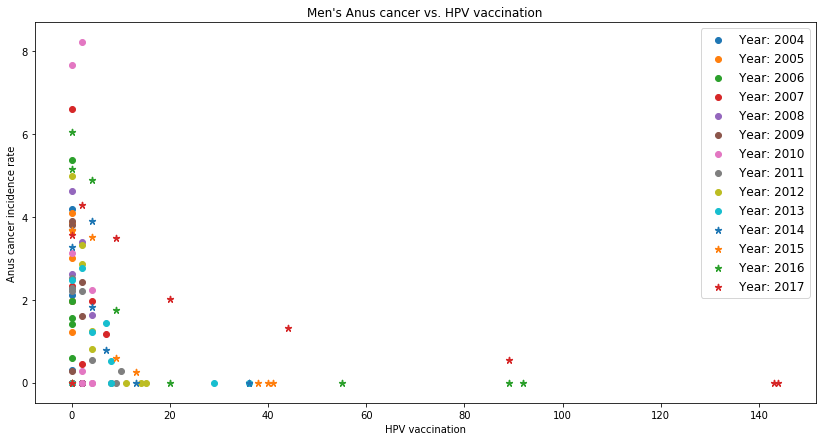

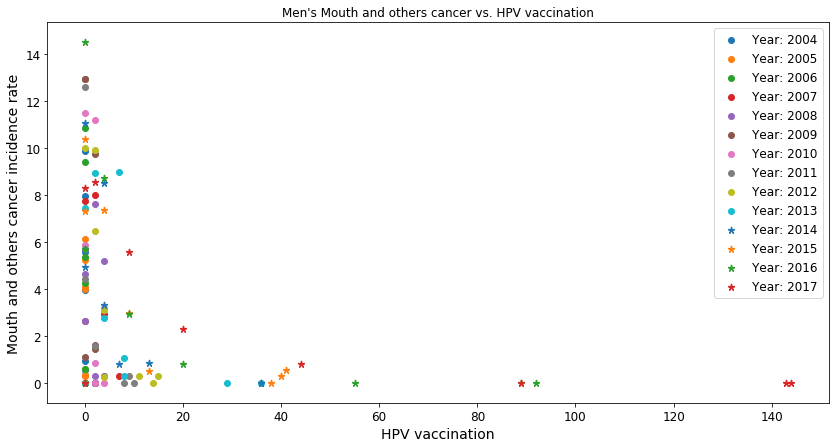

In [9]:
fig, ax = mpf.scatterplot(pd_casesM, inci_A_ageM, titl="Men's Anus cancer vs. HPV vaccination", 
                          Xlabel='HPV vaccination', Ylabel='Anus cancer incidence rate')
ax.legend(pd_year_label)
fig.savefig("plots/Correlation/Men's_Vaccine_cancer(Anus)_scatter.png")

fig, ax = mpf.scatterplot(pd_casesM, inci_MO_ageM, titl="Men's Mouth and others cancer vs. HPV vaccination", 
                          Xlabel='HPV vaccination', Ylabel='Mouth and others cancer incidence rate')
ax.legend(pd_year_label)
fig.savefig("plots/Correlation/Men's_Vaccine_cancer(MouthAndOthers)_scatter.png")

#### Year perspective

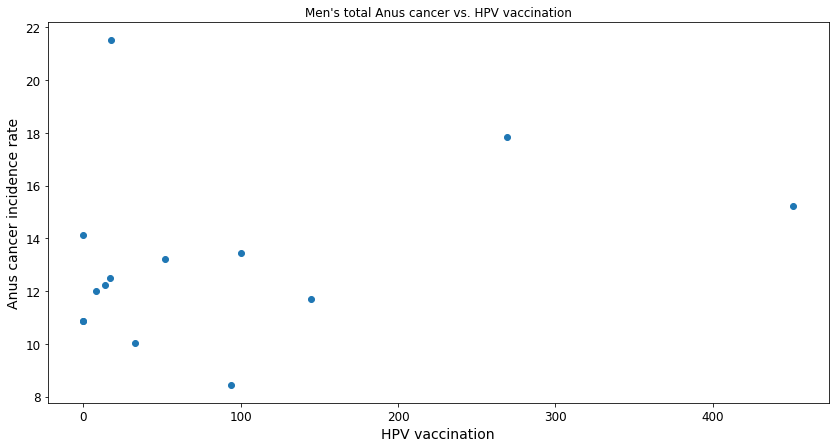

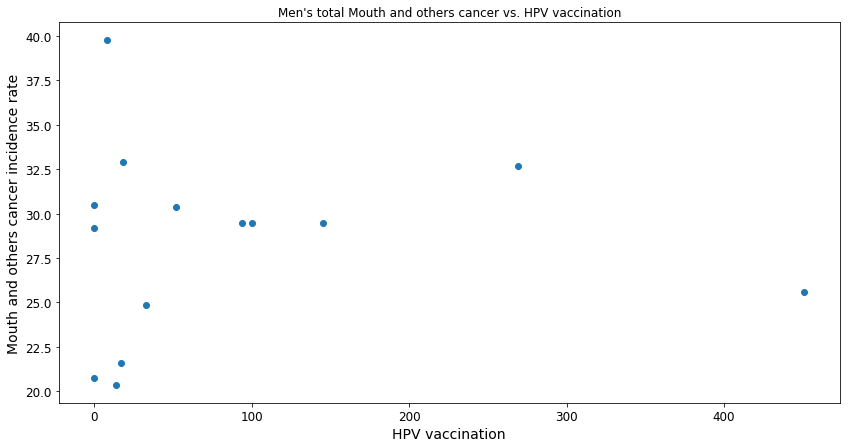

In [10]:
fig, ax = mpf.scatterplot(Mtotal_pd, Mtotal_cancer_A, titl="Men's total Anus cancer vs. HPV vaccination", 
                          Xlabel='HPV vaccination', Ylabel='Anus cancer incidence rate')
fig.savefig("plots/Correlation/Men's_Total_Vaccine_cancer(Anus)_scatter.png")

fig, ax = mpf.scatterplot(Mtotal_pd, Mtotal_cancer_MO, titl="Men's total Mouth and others cancer vs. HPV vaccination", 
                          Xlabel='HPV vaccination', Ylabel='Mouth and others cancer incidence rate')
fig.savefig("plots/Correlation/Men's_Total_Vaccine_cancer(MouthAndOthers)_scatter.png")

#### vaccine accumulation

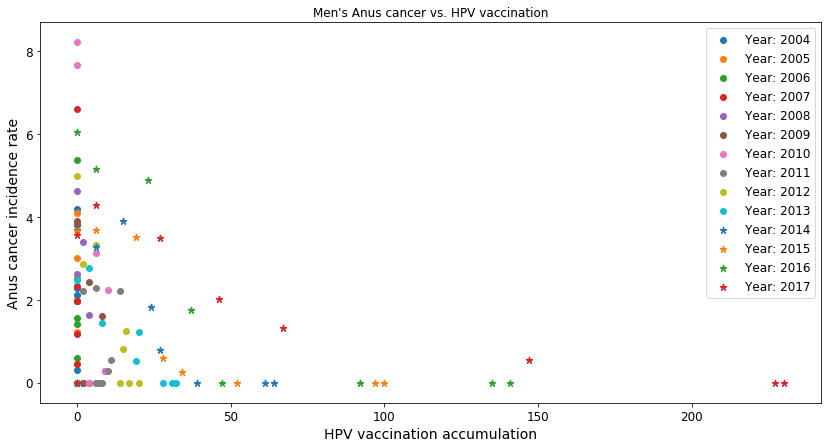

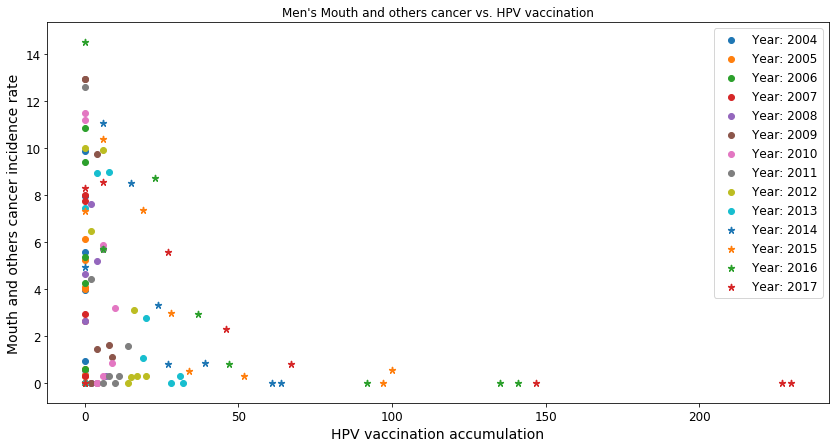

In [11]:
fig, ax = mpf.scatterplot(V_correlationM, inci_A_ageM, titl="Men's Anus cancer vs. HPV vaccination", 
                          Xlabel='HPV vaccination accumulation', Ylabel='Anus cancer incidence rate')
ax.legend(pd_year_label)
fig.savefig("plots/Correlation/Men's_AccumulatedVaccine_cancer(Anus)_scatter.png")

fig, ax = mpf.scatterplot(V_correlationM, inci_MO_ageM, titl="Men's Mouth and others cancer vs. HPV vaccination", 
                          Xlabel='HPV vaccination accumulation', Ylabel='Mouth and others cancer incidence rate')
ax.legend(pd_year_label)
fig.savefig("plots/Correlation/Men's_AccumulatedVaccine_cancer(MouthAndOthers)_scatter.png")

### Women

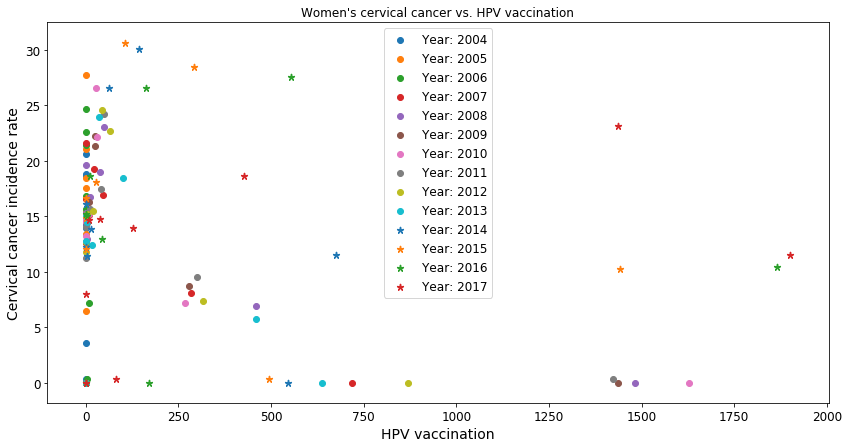

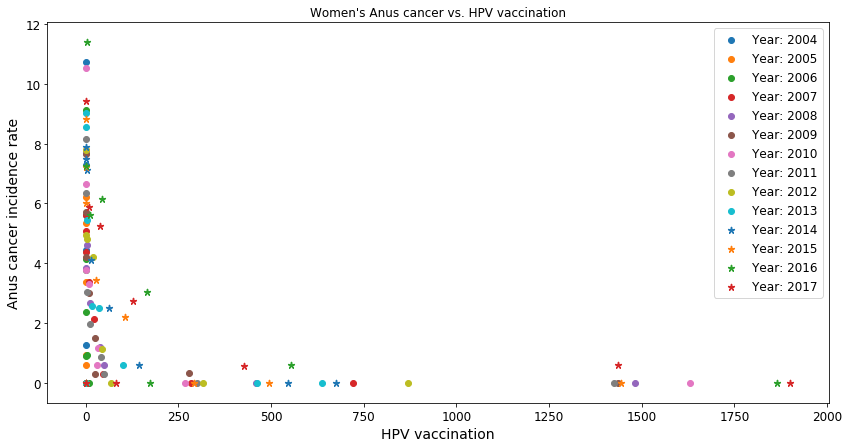

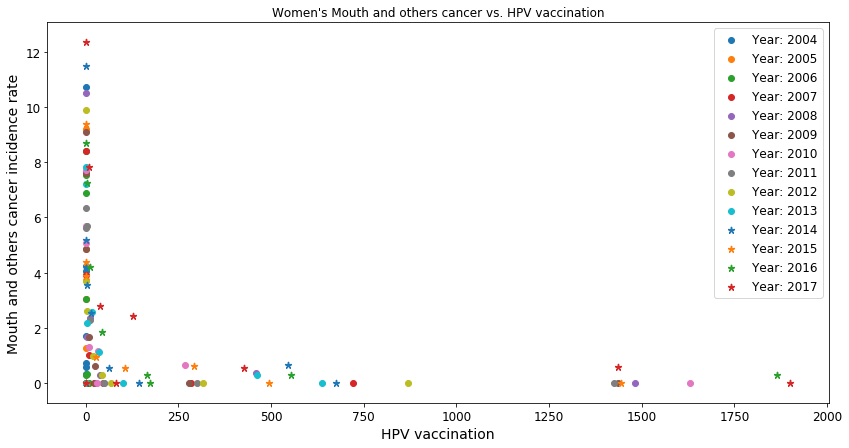

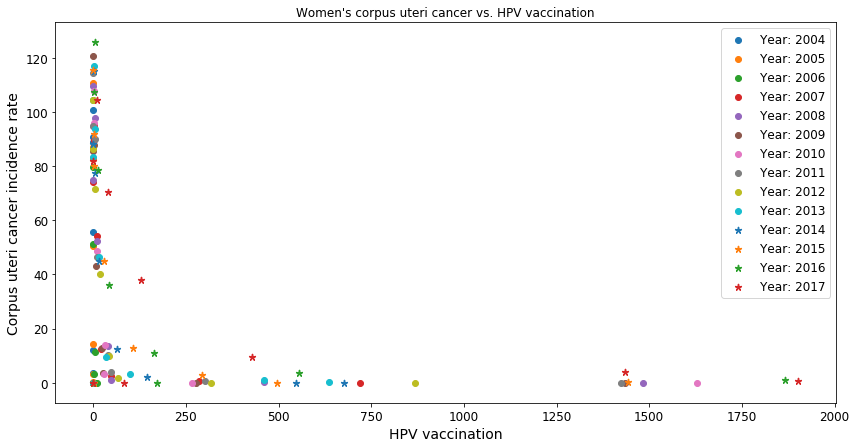

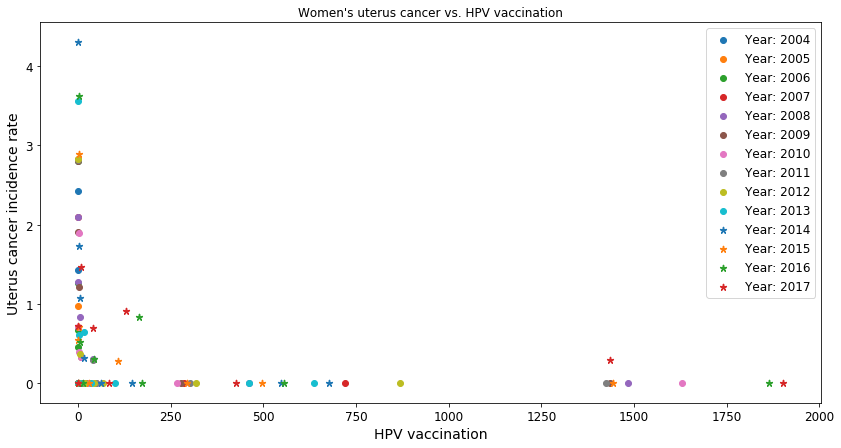

In [12]:
### Cervical cancer
fig, ax = mpf.scatterplot(Y=inci_livmorhals_ageW, X=pd_casesW, titl="Women's cervical cancer vs. HPV vaccination", 
                          Xlabel='HPV vaccination', Ylabel='Cervical cancer incidence rate')
ax.legend(pd_year_label)
fig.savefig("plots/Correlation/Women's_Vaccine_cancer(cervical)_scatter.png")

### Anus cancer
fig, ax = mpf.scatterplot(Y=inci_A_ageW, X=pd_casesW, titl="Women's Anus cancer vs. HPV vaccination", 
                          Xlabel='HPV vaccination', Ylabel='Anus cancer incidence rate')
ax.legend(pd_year_label)
fig.savefig("plots/Correlation/Women's_Vaccine_cancer(Anus)_scatter.png")

### Mouth and other cancer
fig, ax = mpf.scatterplot(Y=inci_MO_ageW, X=pd_casesW, titl="Women's Mouth and others cancer vs. HPV vaccination", 
                          Xlabel='HPV vaccination', Ylabel='Mouth and others cancer incidence rate')
ax.legend(pd_year_label)
fig.savefig("plots/Correlation/Women's_Vaccine_cancer(MouthAndOthers)_scatter.png")

### Corpus uteri cancer
fig, ax = mpf.scatterplot(Y=inci_livmorlegeme_ageW, X=pd_casesW, titl="Women's corpus uteri cancer vs. HPV vaccination", 
                          Xlabel='HPV vaccination', Ylabel='Corpus uteri cancer incidence rate')
ax.legend(pd_year_label)
fig.savefig("plots/Correlation/Women's_Vaccine_cancer(CorpusUteri)_scatter.png")

### Uterus cancer
fig, ax = mpf.scatterplot(Y=inci_livmor_ageW, X=pd_casesW, titl="Women's uterus cancer vs. HPV vaccination", 
                          Xlabel='HPV vaccination', Ylabel='Uterus cancer incidence rate')
ax.legend(pd_year_label)
fig.savefig("plots/Correlation/Women's_Vaccine_cancer(uterus)_scatter.png")

#### Year perspective

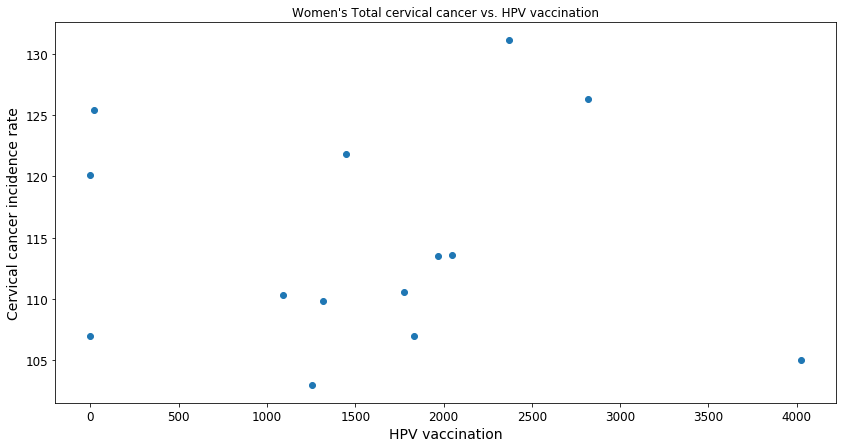

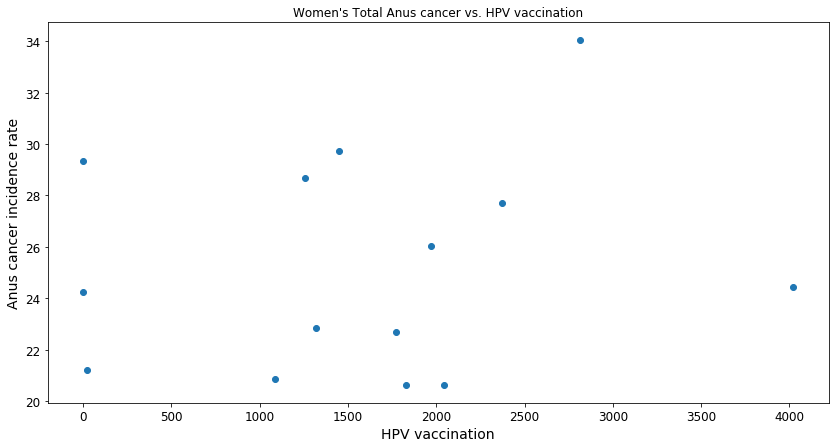

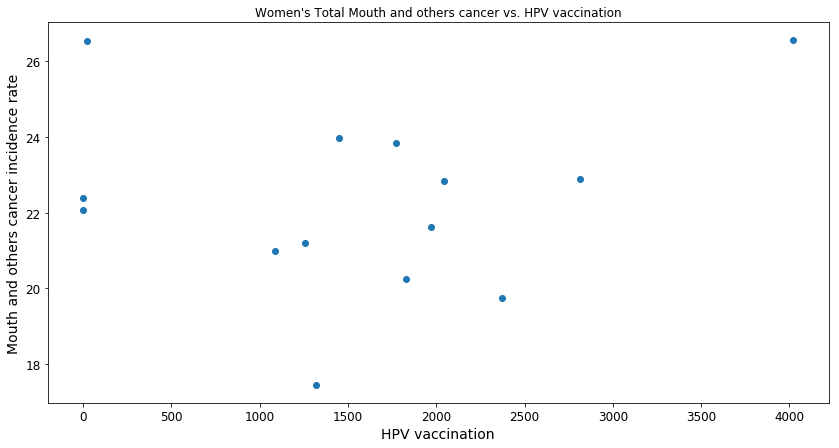

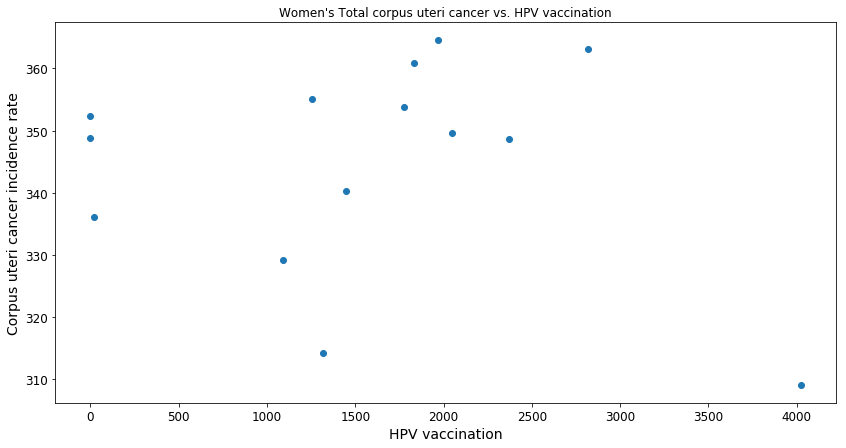

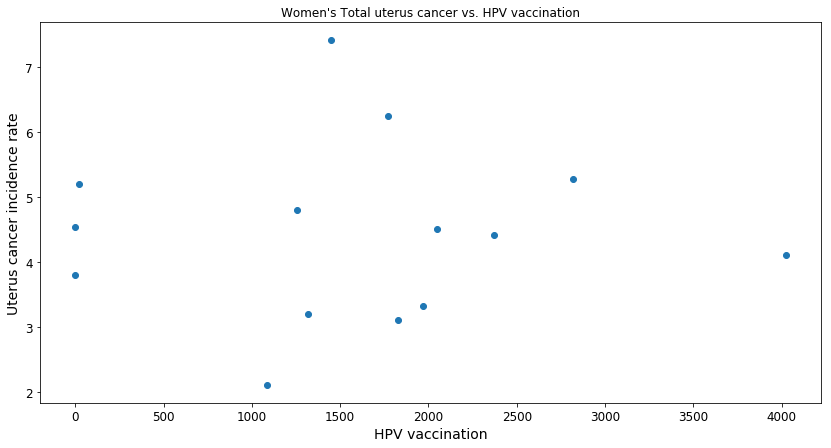

In [13]:
### Cervical cancer
fig, ax = mpf.scatterplot(Y=Wtotal_cancer_livmorhals, X=Wtotal_pd, 
                          titl="Women's Total cervical cancer vs. HPV vaccination", 
                          Xlabel='HPV vaccination', Ylabel='Cervical cancer incidence rate')
fig.savefig("plots/Correlation/Women's_Total_Vaccine_cancer(cervical)_scatter.png")

### Anus cancer
fig, ax = mpf.scatterplot(Y=Wtotal_cancer_A, X=Wtotal_pd, titl="Women's Total Anus cancer vs. HPV vaccination", 
                          Xlabel='HPV vaccination', Ylabel='Anus cancer incidence rate')
fig.savefig("plots/Correlation/Women's_Total_Vaccine_cancer(Anus)_scatter.png")

### Mouth and other cancer
fig, ax = mpf.scatterplot(Y=Wtotal_cancer_MO, X=Wtotal_pd, titl="Women's Total Mouth and others cancer vs. HPV vaccination", 
                          Xlabel='HPV vaccination', Ylabel='Mouth and others cancer incidence rate')
fig.savefig("plots/Correlation/Women's_Total_Vaccine_cancer(MouthAndOthers)_scatter.png")

### Corpus uteri cancer
fig, ax = mpf.scatterplot(Y=Wtotal_cancer_livmorlegeme, X=Wtotal_pd, titl="Women's Total corpus uteri cancer vs. HPV vaccination", 
                          Xlabel='HPV vaccination', Ylabel='Corpus uteri cancer incidence rate')
fig.savefig("plots/Correlation/Women's_Total_Vaccine_cancer(CorpusUteri)_scatter.png")

### Uterus cancer
fig, ax = mpf.scatterplot(Y=Wtotal_cancer_livmor, X=Wtotal_pd, titl="Women's Total uterus cancer vs. HPV vaccination", 
                          Xlabel='HPV vaccination', Ylabel='Uterus cancer incidence rate')
fig.savefig("plots/Correlation/Women's_Total_Vaccine_cancer(uterus)_scatter.png")

#### vaccine accumulation

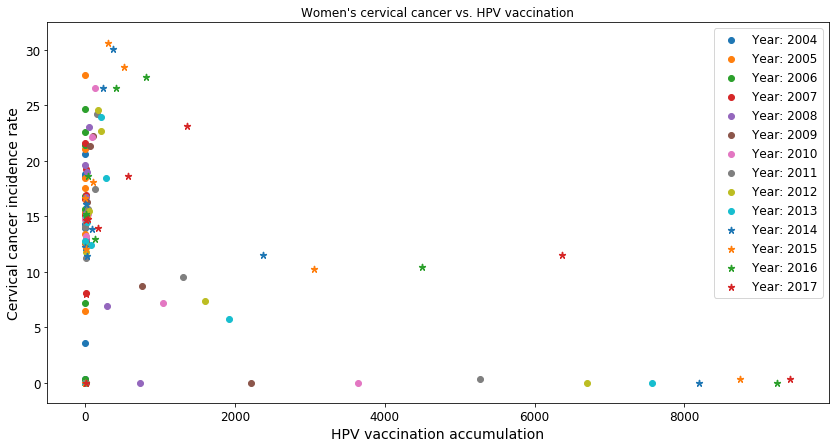

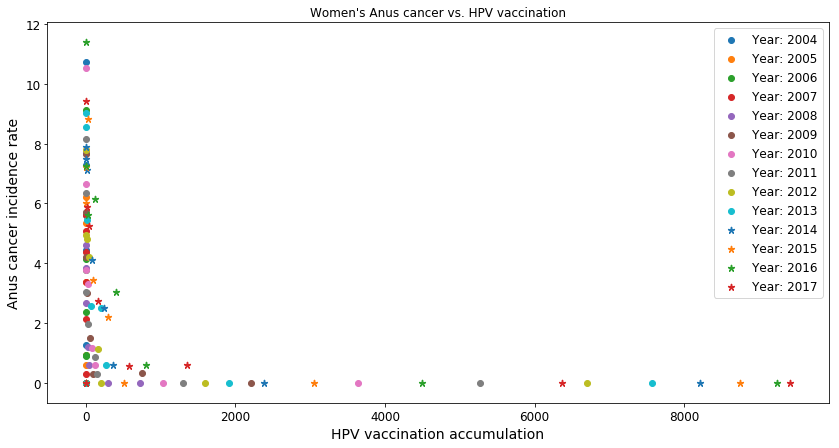

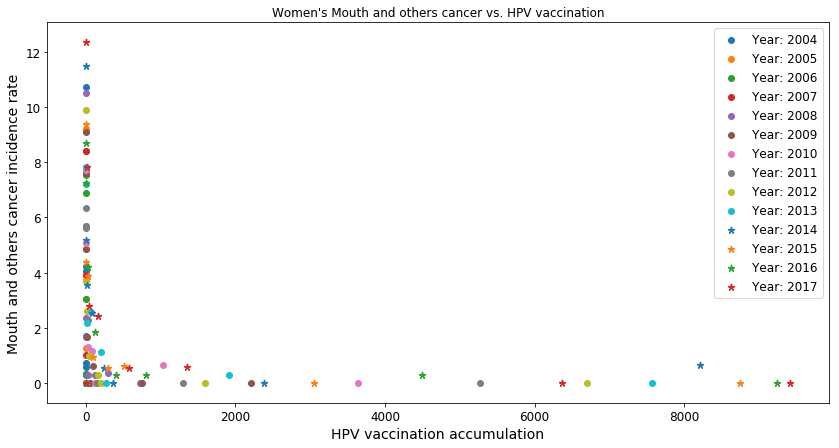

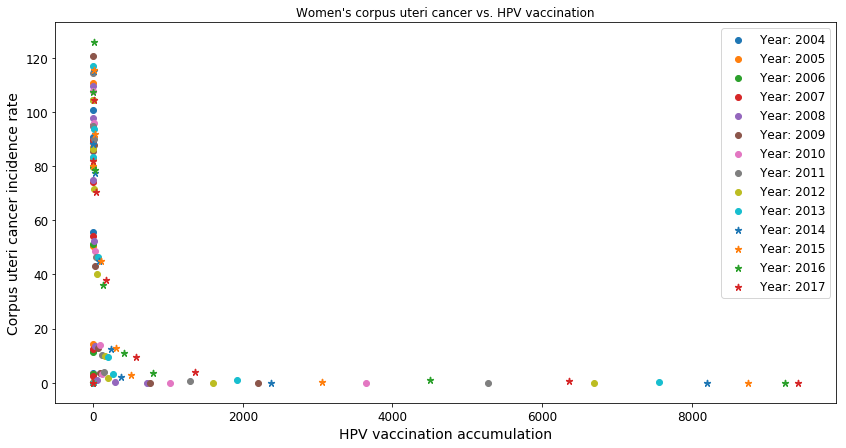

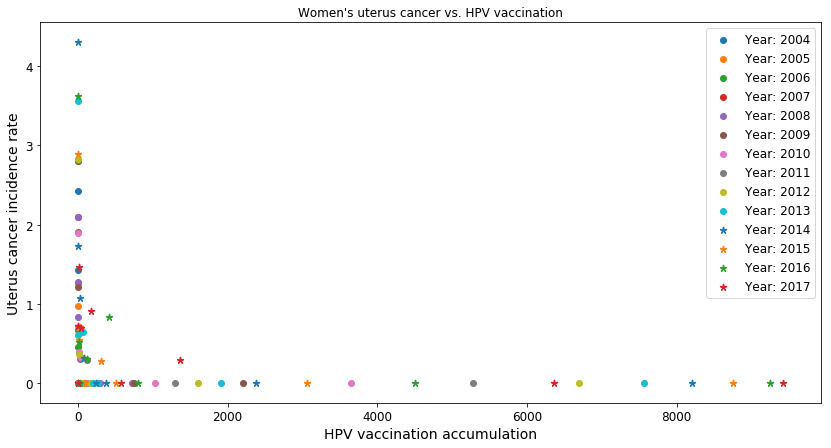

In [14]:
### Cervical cancer
fig, ax = mpf.scatterplot(Y=inci_livmorhals_ageW, X=V_correlationW, titl="Women's cervical cancer vs. HPV vaccination", 
                          Xlabel='HPV vaccination accumulation', Ylabel='Cervical cancer incidence rate')
ax.legend(pd_year_label)
fig.savefig("plots/Female/Women's_AccumulatedVaccine_cancer(cervical)_scatter.png")

### Anus cancer
fig, ax = mpf.scatterplot(Y=inci_A_ageW, X=V_correlationW, titl="Women's Anus cancer vs. HPV vaccination", 
                          Xlabel='HPV vaccination accumulation', Ylabel='Anus cancer incidence rate')
ax.legend(pd_year_label)
fig.savefig("plots/Correlation/Women's_AccumulatedVaccine_cancer(Anus)_scatter.png")

### Mouth and other cancer
fig, ax = mpf.scatterplot(Y=inci_MO_ageW, X=V_correlationW, titl="Women's Mouth and others cancer vs. HPV vaccination", 
                          Xlabel='HPV vaccination accumulation', Ylabel='Mouth and others cancer incidence rate')
ax.legend(pd_year_label)
fig.savefig("plots/Correlation/Women's_AccumulatedVaccine_cancer(MouthAndOthers)_scatter.png")

### Corpus uteri cancer
fig, ax = mpf.scatterplot(Y=inci_livmorlegeme_ageW, X=V_correlationW, titl="Women's corpus uteri cancer vs. HPV vaccination", 
                          Xlabel='HPV vaccination accumulation', Ylabel='Corpus uteri cancer incidence rate')
ax.legend(pd_year_label)
fig.savefig("plots/Correlation/Women's_AccumulatedVaccine_cancer(CorpusUteri)_scatter.png")

### Uterus cancer
fig, ax = mpf.scatterplot(Y=inci_livmor_ageW, X=V_correlationW, titl="Women's uterus cancer vs. HPV vaccination", 
                          Xlabel='HPV vaccination accumulation', Ylabel='Uterus cancer incidence rate')
ax.legend(pd_year_label)
fig.savefig("plots/Correlation/Women's_AccumulatedVaccine_cancer(uterus)_scatter.png")

### Correlation

In [15]:
# row -> years , columns -> ages

pd_casesM_matrix = np.array(pd_casesM)
inci_A_ageM_matrix = np.array(inci_A_ageM)
inci_MO_ageM_matrix = np.array(inci_MO_ageM)

V_correlationW_matrix = np.array(V_correlationW)
pd_casesW_matrix = np.array(pd_casesW)
inci_livmorhals_ageW_matrix = np.array(inci_livmorhals_ageW)
inci_A_ageW_matrix = np.array(inci_A_ageW)
inci_MO_ageW_matrix = np.array(inci_MO_ageW)
inci_livmorlegeme_ageW_matrix = np.array(inci_livmorlegeme_ageW)
inci_livmor_ageW_matrix = np.array(inci_livmor_ageW)

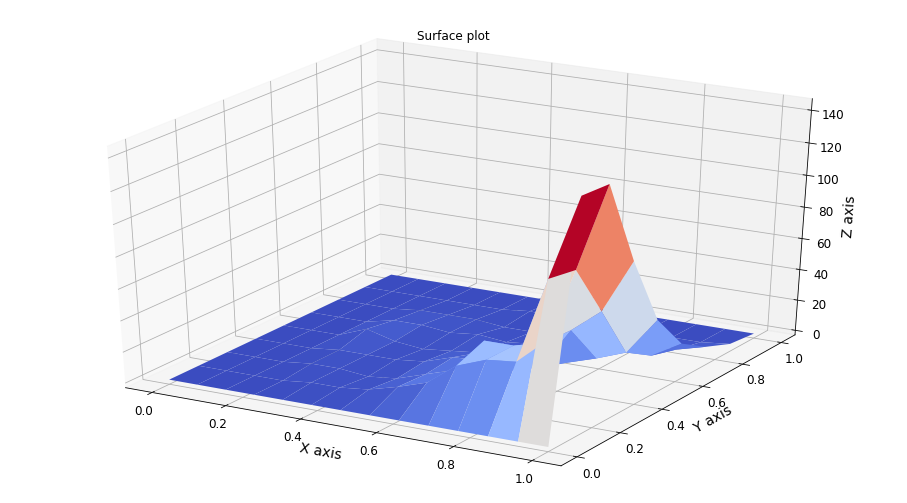

In [16]:
fig, ax = mpf.surface_plot(pd_casesM_matrix.T, X=[], Y=[], titl='Surface plot', Xlabel='X axis', Ylabel='Y axis', Zlabel='Z axis')

In [17]:
x,y = pd_casesM_matrix.shape

In [18]:
np.corrcoef

<function numpy.corrcoef(x, y=None, rowvar=True, bias=<no value>, ddof=<no value>)>